<a href="https://colab.research.google.com/github/bhanavigoyal/Mini-Project--HandWritten-0-1/blob/main/Handwritten_Digital_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Neural Networks for Handwritten Digit Recognition (0,1)

<h2>1 - Packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

<h2>2 - Neural Networks

<h3>2.1 - Problem Statement<h3>

A neural network is used to recognize two handwritten digits, zero and one. This is a binary classification task.


In [2]:
#load subset of data containing only o and 1 into the varialbes.
X,y = load_data()

In [3]:
print('the first element of X is: ',X[0])

the first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
print('The first element of y is: ', y[0,0])
print('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [5]:
#shape of x and y
print("The shape of X is "+ str(X.shape)) # in the output: 1st arg- no of images, 2nd and 3rd arg-width and height
print("The shape of y is "+ str(y.shape))

The shape of X is (1000, 400)
The shape of y is (1000, 1)


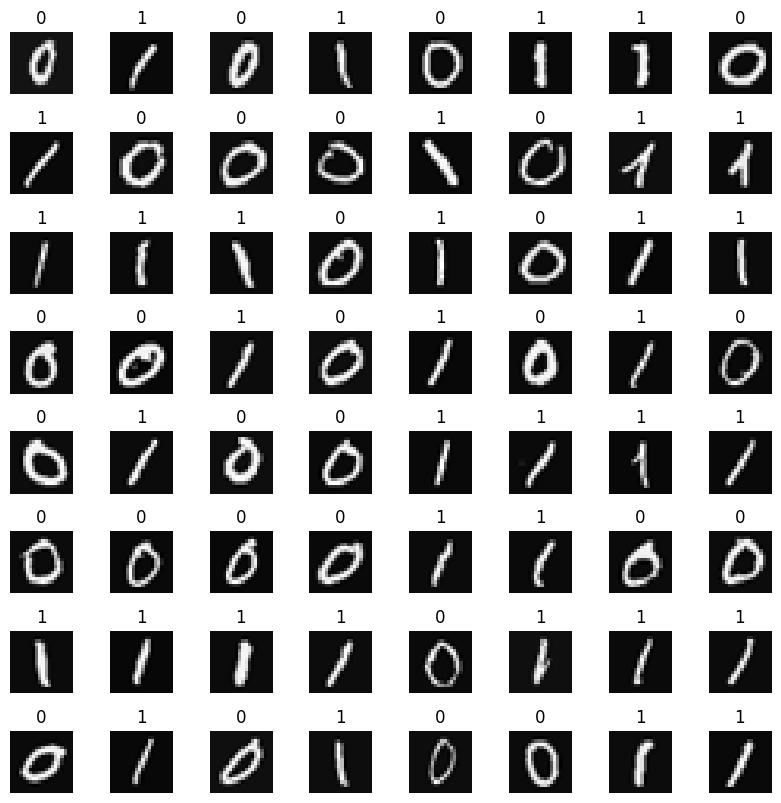

In [6]:
#visualising Data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
  #Select random indices
  random_index = np.random.randint(m)

  #Select rows corresponding to the random indices and reshape the image
  X_random_reshaped = X[random_index].reshape(20,20).T

  #Display the image
  ax.imshow(X_random_reshaped, cmap='gray')

  #Display label above the image
  ax.set_title(y[random_index,0])
  ax.set_axis_off()

using sequential model and dense layer with sigmoid activation for the model

In [7]:
model = Sequential(
    [
    tf.keras.Input(shape=(400,)),  #specify input size
    Dense(25, activation='sigmoid'),
    Dense(15, activation='sigmoid'),
    Dense(1, activation='sigmoid')
    ],name="my_model"
)

In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [9]:
#unit test
from public_tests import *
test_c1(model)

All tests passed!


In [10]:
L1_num_params = 400*25 + 25 #W1 paramenters + b1 parameters
L2_num_params = 25*15 + 15
L3_num_params = 15*1 +1

print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ", L3 params = ", L3_num_params)

L1 params =  10025 , L2 params =  390 , L3 params =  16


In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
#Examine weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [13]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.42323667],
       [-0.12758836],
       [ 0.16486502],
       [-0.22566685],
       [ 0.41576964],
       [-0.08774352],
       [ 0.35872746],
       [ 0.4937213 ],
       [ 0.26164573],
       [-0.17860037],
       [-0.4217292 ],
       [ 0.15446758],
       [-0.22000799],
       [-0.3712707 ],
       [-0.25289586]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6156
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4570
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3163
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2196
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1611
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1241
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0996
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0824
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0694
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 13/20
32/32 [==============================

In [15]:
prediction=model.predict(X[0].reshape(1,400)) #a zero
print(f" predicting a zero: {prediction}")
prediction=model.predict(X[500].reshape(1,400)) #a one
print(f" predicting a one: {prediction}")

1/1 [==============================] - 0s 143ms/step
 predicting a zero: [[0.01376765]]
1/1 [==============================] - 0s 35ms/step
 predicting a one: [[0.97800565]]


In [16]:
if prediction>=0.5:
  yhat=1
else:
  yhat=0
print("prediction after threshold: ", yhat)

prediction after threshold:  1


1/1 [==============================] - 0s 30ms/step


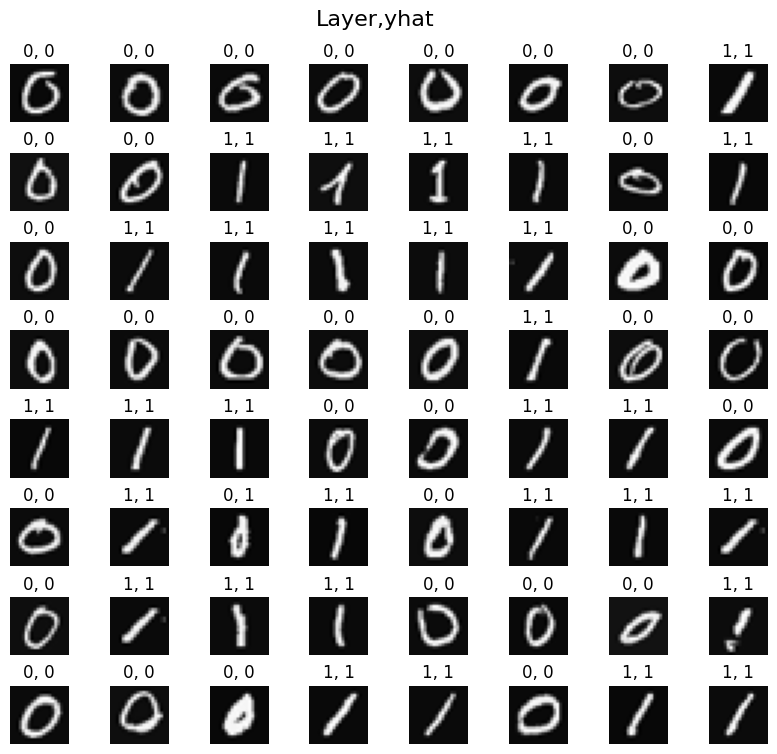

In [17]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
  #select random indices
  random_index = np.random.randint(m)

  X_random_reshaped = X[random_index].reshape((20,20)).T

  ax.imshow(X_random_reshaped, cmap='gray')


  prediction = model.predict(X[random_index].reshape(1,400))
  if prediction>=0.5:
    yhat=1
  else:
    yhat=0

  ax.set_title(f"{y[random_index, 0]}, {yhat}")
  ax.set_axis_off()

fig.suptitle("Layer,yhat", fontsize=16)
plt.show()

Making our own Dense and Sequential function using Numpy

In [21]:
def my_dense(a_in, W, b,g):
  units = W.shape[1]
  a_out = np.zeros(units)

  for i in range(units):
    w = W[:,i]
    z=np.dot(w,a_in)+b[i];
    a_out[i]=g(z)
  return a_out

In [22]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,) #1 example 2 features
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)  #2 input features and 3 output features
b_tst = 0.1*np.arange(1,4,1).reshape(3,) #3 features
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [23]:
test_c2(my_dense)

All tests passed!


In [24]:
def my_sequential(x,W1,b1,W2,b2,W3,b3):
  a1=my_dense(x,W1,b1,sigmoid)
  a2=my_dense(a1,W2,b2,sigmoid)
  a3=my_dense(a2,W3,b3,sigmoid)
  return(a3)

In [25]:
W1_tmp,b1_tmp=layer1.get_weights()
W2_tmp,b2_tmp=layer2.get_weights()
W3_tmp,b3_tmp=layer3.get_weights()

In [26]:
prediction=my_sequential(X[0],W1_tmp,b1_tmp,W2_tmp,b2_tmp,W3_tmp,b3_tmp)
if prediction>=0.5:
  yhat=1
else:
  yhat=0
print("yhat = ", yhat," label = ",y[0,0] )
prediction = my_sequential(X[500],W1_tmp,b1_tmp,W2_tmp,b2_tmp,W3_tmp,b3_tmp)
if prediction>=0.5:
  yhat=1
else:
  yhat = 0
print("yhat = ", yhat," label = ",y[500,0] )

yhat =  0  label =  0
yhat =  1  label =  1


1/1 [==============================] - 0s 24ms/step


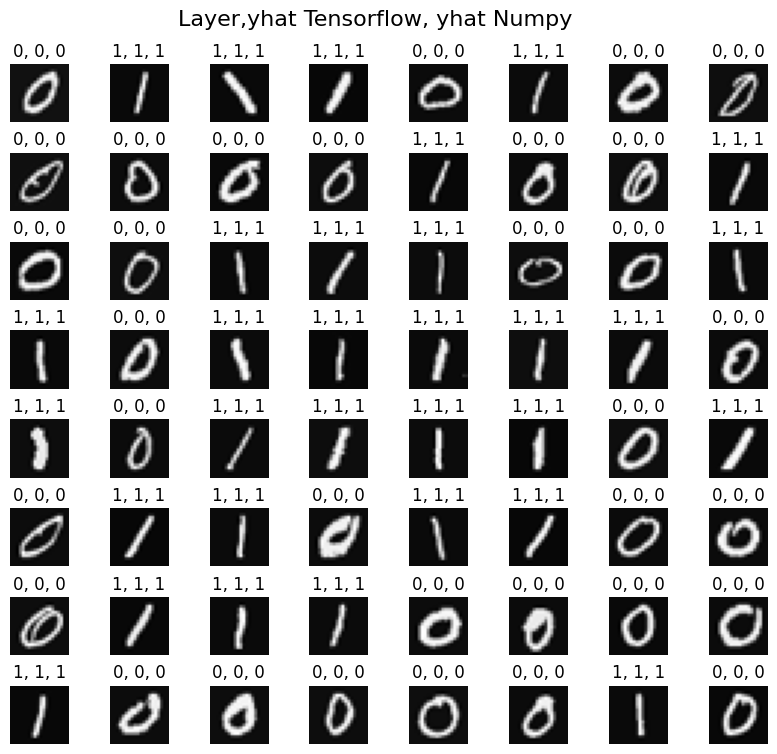

In [27]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad=0.1, rect=[0,0.03,1,0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
  #select random indices
  random_index = np.random.randint(m)

  X_random_reshaped = X[random_index].reshape((20,20)).T

  ax.imshow(X_random_reshaped, cmap='gray')

  my_prediction=my_sequential(X[random_index],W1_tmp,b1_tmp,W2_tmp,b2_tmp,W3_tmp,b3_tmp)
  my_yhat=int(my_prediction>=0.5)

  tf_prediction = model.predict(X[random_index].reshape(1,400))
  tf_yhat=int(tf_prediction>=0.5)

  ax.set_title(f"{y[random_index, 0]}, {tf_yhat}, {my_yhat}")
  ax.set_axis_off()

fig.suptitle("Layer,yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

Making Dense function using np.matmul()

In [29]:
def my_dense_v(A_in, W,b,g):
  Z = np.matmul(A_in,W)+b
  A_out=g(Z)
  return A_out

In [30]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

tf.Tensor(
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]], shape=(4, 3), dtype=float64)


In [31]:
test_c3(my_dense_v)

All tests passed!


In [32]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [33]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [34]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

TensorShape([1000, 1])

In [35]:
Yhat = (Prediction >= 0.5).numpy().astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


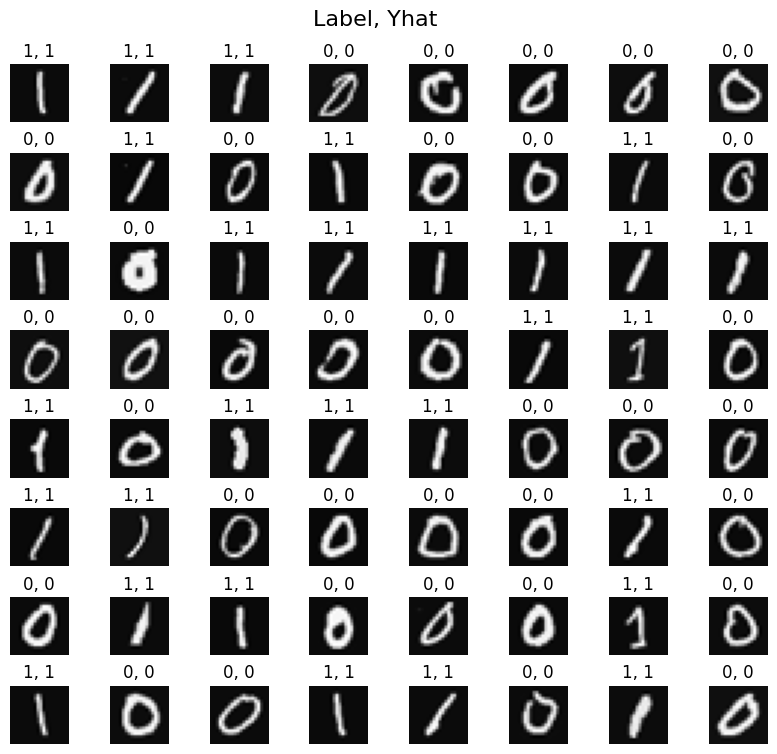

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

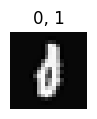

In [37]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()